# Скрипт для проведения кластеризации

Данный скрипт позволяет выполнить иерархическую кластеризацию и методом k-средних. Для выполнения кластеризации замените только название файла и количество кластеров, которые планируете найти.

Обратите внимание на комментарии с восклицательными знаками, как правило, в этих места надо изменить параметр.

В данном примере используется сокращенный набор данных с сайта https://www.wildberries.ru/, категория чайники. 

In [14]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

Ниже нужно изменить имя файла, чтобы загрузить Ваши данные. 

In [38]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df = df.drop(df.columns[16], axis=1)

In [70]:
df.info() # информация о столбцах таблицы и типах меременных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [33]:
df.describe() # статистики по столбцам с количественными переменными

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [72]:
df.columns 

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [39]:
col=['CH2O', 'FAF', 'Height', 'Height', 'FCVC',  'NCP', 'TUE', 'Age' ] 

In [26]:
pd.options.mode.chained_assignment = None 
df[col].fillna(0, inplace=True)

In [18]:
df[col].corr() 

,CH2O,FAF,Height,Height,FCVC,NCP,TUE,Age
CH2O,1.000000,0.167236,0.213376,0.213376,0.068461,0.057088,0.011965,-0.045304
FAF,0.167236,1.000000,0.294709,0.294709,0.019939,0.129504,0.058562,-0.144938
Height,0.213376,0.294709,1.000000,1.000000,-0.038121,0.243672,0.051912,-0.025958
Height,0.213376,0.294709,1.000000,1.000000,-0.038121,0.243672,0.051912,-0.025958
FCVC,0.068461,0.019939,-0.038121,-0.038121,1.000000,0.042216,-0.101135,0.016291
NCP,0.057088,0.129504,0.243672,0.243672,0.042216,1.000000,0.036326,-0.043944
TUE,0.011965,0.058562,0.051912,0.051912,-0.101135,0.036326,1.000000,-0.296931
Age,-0.045304,-0.144938,-0.025958,-0.025958,0.016291,-0.043944,-0.296931,1.000000


без PCA и нормализации

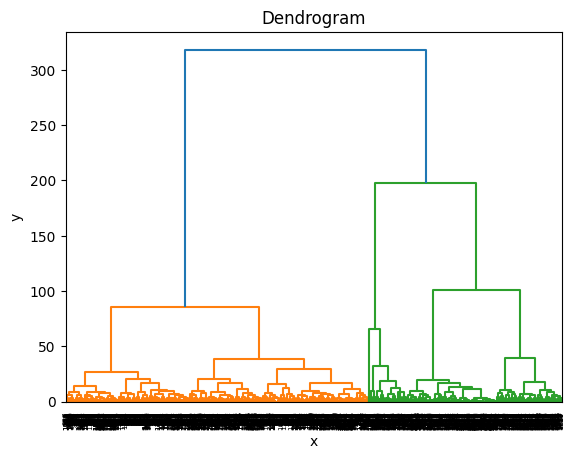

In [41]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df[col].values, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


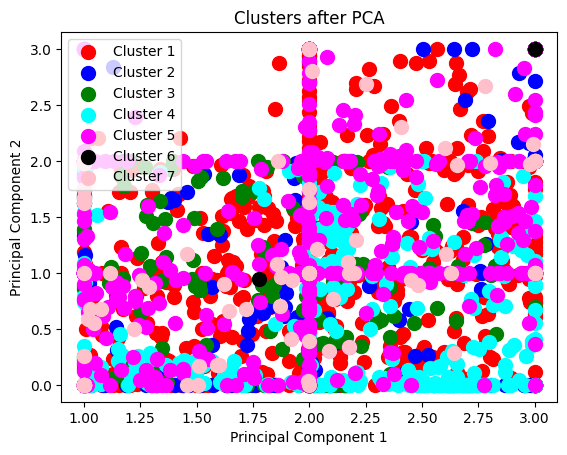

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

data_pca = df[col].values

hc = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_pca)

# Визуализация результатов кластеризации
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_pca[y_hc == 4, 0], data_pca[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(data_pca[y_hc == 5, 0], data_pca[y_hc == 5, 1], s=100, c='black', label='Cluster 6')
plt.scatter(data_pca[y_hc == 6, 0], data_pca[y_hc == 6, 1], s=100, c='pink', label='Cluster 7')
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


c pca без нормализации

/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


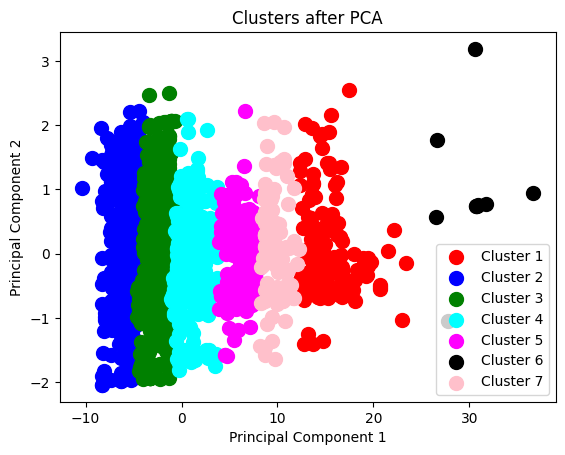

In [42]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Создание объекта PCA с количеством компонентов, которые вы хотите использовать
pca = PCA(n_components=2)

# Применение PCA к данным
data_pca = pca.fit_transform(df[col].values)
#data_pca = dataNorm
# Кластеризация на преобразованных данных
hc = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_pca)

# Визуализация результатов кластеризации
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_pca[y_hc == 4, 0], data_pca[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(data_pca[y_hc == 5, 0], data_pca[y_hc == 5, 1], s=100, c='black', label='Cluster 6')
plt.scatter(data_pca[y_hc == 6, 0], data_pca[y_hc == 6, 1], s=100, c='pink', label='Cluster 7')
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


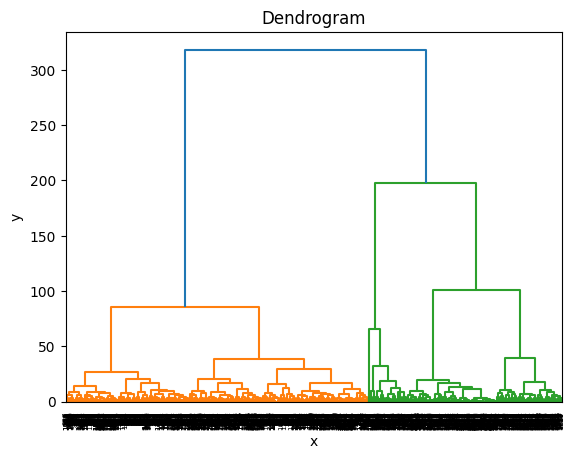

In [44]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df[col].values, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:

from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

С pca и нормализацией

/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


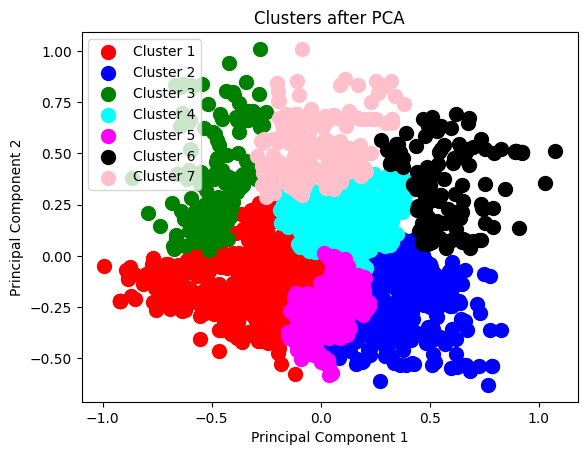

In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Создание объекта PCA с количеством компонентов, которые вы хотите использовать
pca = PCA(n_components=2)

# Применение PCA к данным
data_pca = pca.fit_transform(dataNorm)
#data_pca = dataNorm
# Кластеризация на преобразованных данных
hc = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_pca)

# Визуализация результатов кластеризации
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_pca[y_hc == 4, 0], data_pca[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(data_pca[y_hc == 5, 0], data_pca[y_hc == 5, 1], s=100, c='black', label='Cluster 6')
plt.scatter(data_pca[y_hc == 6, 0], data_pca[y_hc == 6, 1], s=100, c='pink', label='Cluster 7')
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


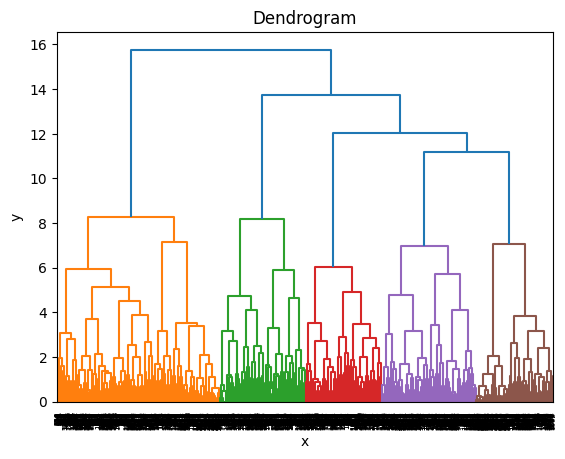

In [37]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataNorm, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

по двум аттрибутам

/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


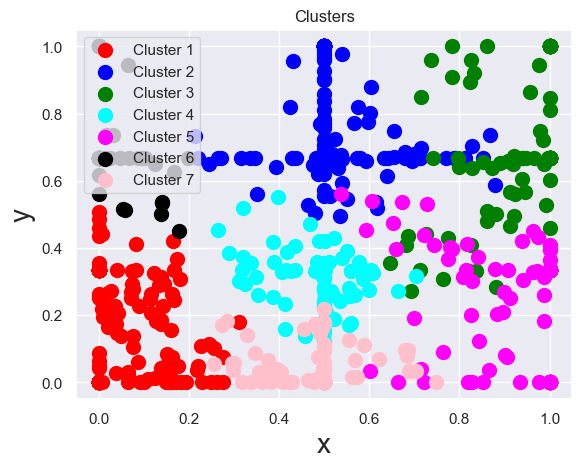

In [312]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataNorm)
plt.scatter(dataNorm[y_hc == 0, 0], dataNorm[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataNorm[y_hc == 1, 0], dataNorm[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataNorm[y_hc == 2, 0], dataNorm[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dataNorm[y_hc == 3, 0], dataNorm[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(dataNorm[y_hc == 4, 0], dataNorm[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(dataNorm[y_hc == 5, 0], dataNorm[y_hc == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(dataNorm[y_hc == 6, 0], dataNorm[y_hc == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')
#plt.scatter(dataNorm[y_hc == 7, 0], dataNorm[y_hc == 7, 1], s = 100, c = 'yellow', label = 'Cluster 8')
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


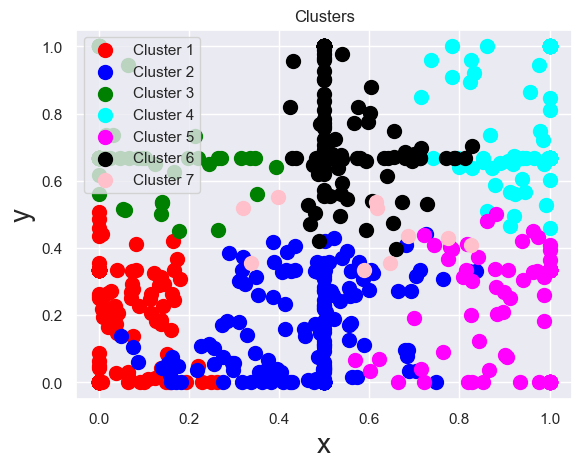

In [314]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'manhattan', linkage = 'average')
y_hc = hc.fit_predict(dataNorm)
plt.scatter(dataNorm[y_hc == 0, 0], dataNorm[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataNorm[y_hc == 1, 0], dataNorm[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dataNorm[y_hc == 2, 0], dataNorm[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dataNorm[y_hc == 3, 0], dataNorm[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(dataNorm[y_hc == 4, 0], dataNorm[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(dataNorm[y_hc == 5, 0], dataNorm[y_hc == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(dataNorm[y_hc == 6, 0], dataNorm[y_hc == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')
#plt.scatter(dataNorm[y_hc == 7, 0], dataNorm[y_hc == 7, 1], s = 100, c = 'yellow', label = 'Cluster 8')
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

дальше можно найти метод локтя и еще чужой код по иерархической кластеризации хз зачем нужен просто так оставила

In [291]:
import seaborn as sns
sns.set()
from sklearn.cluster import AgglomerativeClustering

cl = AgglomerativeClustering(n_clusters=3, linkage = 'ward', affinity='euclidean')
labels = cl.fit_predict(dataNorm)
plt.figure(figsize=(10,6))
plt.rc('axes', labelsize=20)   
sns.scatterplot(data=dataNorm,  hue=labels)

/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1000x600 with 0 Axes>

In [46]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

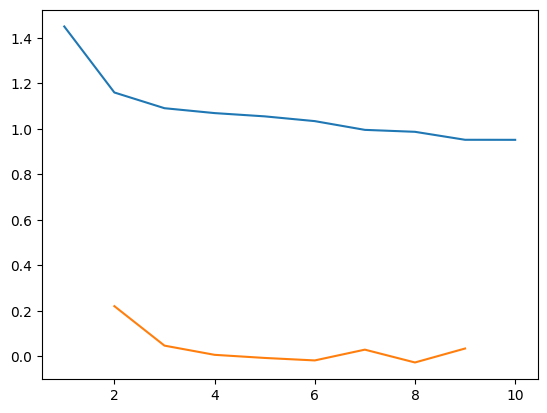

Рекомендованное количество кластеров: 2


In [47]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [283]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [284]:
# !!!!!!!!! укажите, какое количество кластеров будете использовать!
nClust=3

In [285]:
#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

TypeError: 'dict' object is not callable

ValueError: could not convert string to float: 'yes'

In [116]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')


In [117]:
clusters

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 6, 8, 5, 8, 8, 3,
       8, 4, 8, 8, 8, 8, 8, 8, 4, 6, 8, 8, 8, 8, 6, 6, 8, 8, 8, 8, 6, 8,
       4, 6, 4, 4, 8, 8, 8, 6, 8, 8, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 6, 4,
       4, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 5, 5, 8, 8, 8, 8, 8, 8, 5, 5, 8, 5, 8, 8, 8, 8, 8, 8, 6, 8, 8,
       8, 6, 8, 8, 8, 8, 5, 8, 8, 8, 8, 4, 5, 8, 5, 8, 8, 8, 5, 8, 8, 6,
       8, 3, 5, 8, 8, 7, 8, 8, 8, 8, 6, 5, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8,
       8, 8, 5, 8, 7, 8, 5, 3, 8, 8, 8, 6, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8,
       5, 8, 8, 8, 8, 6, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       6, 6, 8, 6, 5, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 4, 8,
       8, 6, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 7, 8, 8, 8, 4, 5, 8, 8, 8, 8,
       4, 8, 8, 8, 8, 5, 8, 8, 8, 8, 3, 8, 8, 4, 8, 8, 5, 6, 6, 8, 8, 6,
       8, 6, 8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 6, 8, 4, 6,
       6, 8, 5, 8, 8, 8, 6, 8, 8, 6, 8, 8, 6, 8, 6,

In [86]:
col

['Height', 'Weight', 'Age', 'FCVC', 'CH2O']

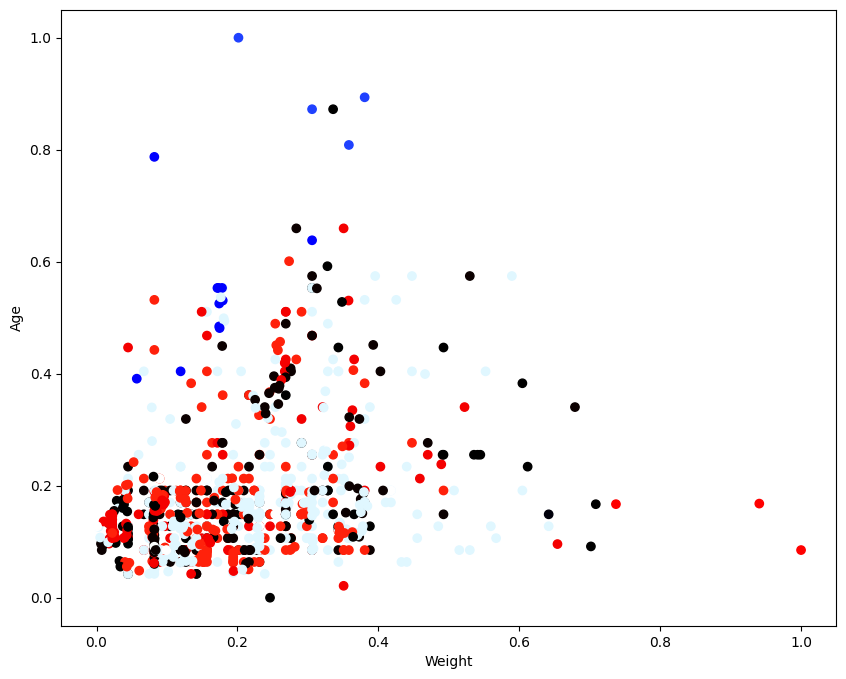

In [111]:
x=1 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [112]:
# к оригинальным данным добавляем номер кластера
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,Height,Weight,Age,FCVC,CH2O,Количество
I,,,,,,
1,1.823021,158.618051,20.584649,3.000000,2.197083,3
2,1.850000,125.000000,21.000000,3.000000,1.000000,1
3,1.695000,80.750000,56.000000,2.500000,2.000000,4
4,1.687866,67.166906,21.050015,1.054851,2.114399,35
5,1.641482,60.000147,22.607303,2.911392,1.109153,118
6,1.669619,63.929575,22.355242,1.853363,1.072766,148
7,1.568023,60.975174,39.197781,2.642649,2.822096,12
8,1.693493,70.366720,22.097089,2.017967,2.258092,374
9,1.715285,63.530016,21.377983,2.882987,1.998200,217


In [113]:
df[df['I']==2] # !!!!! меняйте номер кластера

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,I
398,Male,21.0,1.85,125.0,yes,yes,3.0,1.0,Always,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,2


In [22]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [23]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([2, 5, 1, 1, 1, 2, 6, 2, 2, 1, 6, 1, 5, 2, 6, 2, 2, 2, 3, 2, 5, 5,
       3, 4, 5, 2, 3, 5, 2, 5, 2, 2, 3, 1, 5, 2, 2, 6, 1, 5, 5, 5, 2, 2,
       2, 2, 2, 6, 2, 5, 6, 2, 5, 3, 6, 5, 5, 2, 3, 5, 2, 2, 5, 5, 5, 5,
       3, 2, 5, 2, 2, 3, 2, 2, 6, 1, 2, 2, 2, 6, 6, 5, 5, 1, 2, 6, 2, 3,
       5, 5, 5, 2, 3, 1, 2, 5, 2, 2, 4, 4, 4, 4, 2, 2, 5, 5, 2, 2, 2, 5,
       2, 2, 2, 5, 2, 2, 2, 6, 2, 5, 2, 4, 2, 3, 2, 5, 5, 5, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 6, 2, 3, 2, 2, 6, 5, 6, 5, 6, 2, 2, 2,
       3, 2, 5, 2, 2, 2, 2, 5, 5, 2, 4, 3, 2, 4, 2, 5, 5, 2, 6, 2, 1, 2,
       6, 2, 2, 5, 2, 2, 2, 1, 1, 2, 5, 1, 1, 1, 1, 1, 2, 6, 6, 6, 2, 2,
       2, 6, 2, 2, 6, 6, 2, 2, 6, 6, 2, 5, 2, 4, 6, 2, 2, 2, 2, 2, 2, 5,
       2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 5, 6, 2, 2, 1, 1, 1, 1, 2, 2, 5, 2,
       2, 5, 6, 6, 2, 5, 6, 5, 5, 5, 3, 2, 2, 5, 2, 2, 5, 5, 2, 2, 2, 2,
       2, 3, 5, 6, 2, 5, 5, 2, 5, 2, 3, 3, 2, 3, 2, 6, 6, 6, 6, 3, 6, 6,
       2, 6, 2, 2, 2, 3, 3, 2, 5, 2, 5, 2, 6, 6, 2,

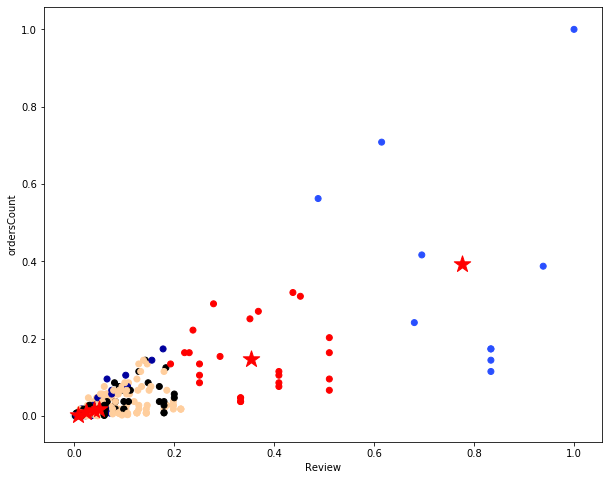

In [24]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [25]:
# к оригинальным данным добавляем номера кластеров
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,Review,Star,ordersCount,Количество
KMeans,,,,
1,188.760000,4.320000,1532.000000,25
2,26.554795,4.000000,201.541096,292
3,3.510204,1.530612,39.795918,49
4,414.700000,4.700000,4050.000000,10
5,12.072464,3.000000,128.405797,138
6,20.851562,5.000000,177.890625,128


In [26]:
df[df['KMeans']==6] # изменяйте номер кластера, содержание которого хотите просмотреть

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june,I,KMeans
6,2508310,48,5,2323,17158,Tefal,Чайник Tefal Express Plastic KO29913E,0,https://www.wildberries.ru/catalog/2508310/det...,0,...,пластик,KO29913E,2200.0,1.5,Франция,Китай,белый,100,2,6
10,2793781,76,5,3892,16012,Philips,Чайник Viva Collection HD9327/10,0,https://www.wildberries.ru/catalog/2793781/det...,0,...,нержавеющая сталь,HD9327/10,2200.0,1.7,Нидерланды,Китай,"серебристый, черный",0,2,6
14,3016890,98,5,4859,599,REDMOND,Чайник RK-CBM146,0,https://www.wildberries.ru/catalog/3016890/det...,0,...,NaN,RK-CBM146,2200.0,1.7,Соединенные Штаты,Китай,"черный, бронзовый",100,2,6
37,3580809,1,5,1890,17106,Vitek,Чайник электрический VT-7059,0,https://www.wildberries.ru/catalog/3580809/det...,0,...,пластик,VT-7059,2200.0,1.7,Россия,Китай,"белый, голубой",0,2,6
47,3653531,52,5,3190,16102,Kitfort,Чайник КТ-613,0,https://www.wildberries.ru/catalog/3653531/det...,0,...,металл,КТ-613,2000.0,1.7,Россия,Китай,серебристый,100,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,11839408,3,5,2617,16116,Braun,Чайник Multiquick 3 WK300 Cream,0,https://www.wildberries.ru/catalog/11839408/de...,0,...,пластик,WK300.CREAM,2200.0,1.7,Германия,Чешская Республика,кремовый,50,2,6
630,11839409,10,5,3175,16116,Braun,Чайник Multiquick 3 WK300 ONIX,0,https://www.wildberries.ru/catalog/11839409/de...,1,...,пластик,WK300.ONYX,2200.0,1.7,Германия,Чешская Республика,черный,0,2,6
631,11839410,3,5,2617,16116,Braun,Чайник Multiquick 3 WK300 White,0,https://www.wildberries.ru/catalog/11839410/de...,0,...,пластик,WK300.WH,2200.0,1.7,Германия,Чешская Республика,белый,40,2,6
639,12151308,33,5,1649,3300,Polaris,Эл. чайник PWK 1756С Moon (POLARIS),0,https://www.wildberries.ru/catalog/12151308/de...,0,...,пластик,PWK1756СMoon,2150.0,1.7,Россия,Китай,белый,200,2,6


In [27]:
df[df['KMeans']==4][['Review', 'Star', 'ordersCount', 'Value', 'brandName', 'goodsName',
       'Мощность устройства', 'Объем чайника', 'Цвет']]

,Review,Star,ordersCount,Value,brandName,goodsName,Мощность устройства,Объем чайника,Цвет
23,329,4,7300,2195,REDMOND,Чайник RK-G178,2200.0,1.7,"черный, прозрачный"
98,446,5,1200,1205,GALAXY,Чайник электрический GL0318,2000.0,1.7,"белый, серый"
99,446,5,1800,1205,GALAXY,Чайник электрический GL0318,2000.0,1.7,"салатовый, серый"
100,446,5,1800,1205,GALAXY,Чайник электрический GL0318,2000.0,1.7,"коричневый, серый"
101,446,5,1500,1205,GALAXY,Чайник электрический GL0318,2000.0,1.7,"красный, серый"
121,535,5,10300,2180,REDMOND,Электрический чайник RK-M177,2100.0,1.7,серый
164,502,4,4000,4990,Bosch,Чайник TWK 8611/8612/8613/8614/8617/8619,2400.0,1.5,черный
167,364,5,2500,2074,Delonghi,Чайник Active Line KBLA 2000,2000.0,1.0,"черный, серебристый"
211,372,4,4300,3630,Gorenje,Чайник K17CLI,2200.0,1.7,бежевый
304,261,5,5800,2186,REDMOND,Чайник RК-М155,2200.0,1.7,серебристый


In [28]:
# сохраним результаты в файл
df.to_excel('result_claster.xlsx', index=False)